In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Analisis exploratorio de **datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv(r"/content/drive/My Drive/movie_data.csv")
dataset.head(25)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


In [ ]:
dataset.shape

(50000, 2)

In [ ]:
dataset.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y = dataset['sentiment'].values

In [ ]:
dataset['review'][11]

"Hidden Frontier is notable for being the longest running internet-based Star Trek fan series. While the production quality is not on a par with fan productions like Starship Exeter, or New Voyages, Hidden Frontier concentrates largely on story, and in that regard it does very well indeed.<br /><br />Hidden Frontier has no physical sets; instead actors are filmed against a greenscreen, and the backgrounds inserted digitally. One of Hidden Frontier's greatest achievements is the sheer volume of work they have produced. One of the ways in which this is achieved is by inserting the virtual sets at the time of filming, instead of in post-production. While this does save a great deal of time, it's also worth noting that the quality of the resultant footage is not as high as if it had been produced in post-production, though it still serves its purpose. <br /><br />While it may not be everyone's cup of tea, Hidden Frontier is well worth a shot, though you might be best to start off watching 

Ingeniería / selección de características + limpieza de datos (si es necesario)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')
sw = set(stopwords.words('english'))
print(stopwords.words('english'))
ps = PorterStemmer()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    
    sample = sample.split()
    
    sample = [ps.stem(s) for s in sample if s not in sw] # list comprehension
    
    sample = " ".join(sample)
    
    return sample

In [ ]:
clean_text(dataset['review'][11])

'hidden frontier notabl longest run internet base star trek fan seri product qualiti par fan product like starship exet new voyag hidden frontier concentr larg stori regard well inde hidden frontier physic set instead actor film greenscreen background insert digit one hidden frontier greatest achiev sheer volum work produc one way achiev insert virtual set time film instead post product save great deal time also worth note qualiti result footag high produc post product though still serv purpos may everyon cup tea hidden frontier well worth shot though might best start watch third season sinc produc realli start hit stride'

In [ ]:
dataset['review'][11]

"Hidden Frontier is notable for being the longest running internet-based Star Trek fan series. While the production quality is not on a par with fan productions like Starship Exeter, or New Voyages, Hidden Frontier concentrates largely on story, and in that regard it does very well indeed.<br /><br />Hidden Frontier has no physical sets; instead actors are filmed against a greenscreen, and the backgrounds inserted digitally. One of Hidden Frontier's greatest achievements is the sheer volume of work they have produced. One of the ways in which this is achieved is by inserting the virtual sets at the time of filming, instead of in post-production. While this does save a great deal of time, it's also worth noting that the quality of the resultant footage is not as high as if it had been produced in post-production, though it still serves its purpose. <br /><br />While it may not be everyone's cup of tea, Hidden Frontier is well worth a shot, though you might be best to start off watching 

In [ ]:
dataset['cleaned_review'] =  dataset['review'].apply(clean_text)

In [ ]:
corpus = dataset['cleaned_review'].values
print(corpus)


['teenag martha moxley maggi grace move high class area bell greenwich connecticut mischief night eve halloween murder backyard hous murder remain unsolv twenti two year later writer mark fuhrman christoph meloni former la detect fallen disgrac perjuri j simpson trial move idaho decid investig case partner stephen week andrew mitchel purpos write book local squirm welcom support retir detect steve carrol robert forster charg investig discov crimin net power money cover murder murder greenwich good tv movi true stori murder fifteen year old girl commit wealthi teenag whose mother kennedi power rich famili use influenc cover murder twenti year howev snoopi detect convict perjur disgrac abl disclos hideou crime commit screenplay show investig mark last day martha parallel lack emot dramat vote seven titl brazil avail'
 'ok realli like kri kristofferson usual easi go deliveri line movi age help soft spoken low energi style steal scene effortlessli disappear misstep holi moli bad movi must 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
cv = CountVectorizer(max_df = 0.5, max_features=50000)


In [ ]:
X = cv.fit_transform(corpus)

In [ ]:
print(X[0])

  (0, 41390)	2
  (0, 24432)	2
  (0, 26343)	1
  (0, 23878)	1
  (0, 16704)	1
  (0, 26322)	2
  (0, 18293)	1
  (0, 8484)	1
  (0, 2732)	1
  (0, 4896)	1
  (0, 16872)	2
  (0, 9172)	1
  (0, 25688)	1
  (0, 27268)	1
  (0, 13534)	1
  (0, 17443)	1
  (0, 26523)	6
  (0, 3876)	1
  (0, 18820)	1
  (0, 32109)	1
  (0, 45259)	1
  (0, 44258)	2
  (0, 44298)	1
  (0, 49128)	3
  (0, 22384)	1
  :	:
  (0, 32504)	1
  (0, 13947)	1
  (0, 45600)	1
  (0, 19696)	1
  (0, 18851)	1
  (0, 37494)	1
  (0, 9324)	1
  (0, 29393)	1
  (0, 166)	1
  (0, 11491)	1
  (0, 18281)	1
  (0, 9832)	1
  (0, 35121)	1
  (0, 36284)	1
  (0, 22371)	1
  (0, 10513)	1
  (0, 28870)	1
  (0, 22098)	1
  (0, 13055)	1
  (0, 12103)	1
  (0, 46640)	1
  (0, 35674)	1
  (0, 42671)	1
  (0, 6213)	1
  (0, 3617)	1


In [ ]:
tfidf = TfidfTransformer()

In [ ]:
X = tfidf.fit_transform(X)

In [ ]:
print(X[0])

  (0, 166)	0.03475328013909993
  (0, 1983)	0.07590584192166375
  (0, 2732)	0.055343234205392625
  (0, 3617)	0.054189987042393195
  (0, 3876)	0.122765319587759
  (0, 4896)	0.07834147279992872
  (0, 5887)	0.029580512641779674
  (0, 6213)	0.08645439467249252
  (0, 7402)	0.11915543645962015
  (0, 7445)	0.03123526061591797
  (0, 7883)	0.06335824915483708
  (0, 8283)	0.060889731870932016
  (0, 8484)	0.04156218349599297
  (0, 8949)	0.10649458572913884
  (0, 9172)	0.13238307641596536
  (0, 9324)	0.07203761843192731
  (0, 9632)	0.08298554496587077
  (0, 9832)	0.04458660964714327
  (0, 9837)	0.05621049340038231
  (0, 10513)	0.019910333333456903
  (0, 10648)	0.030477758166570845
  (0, 11101)	0.16838223172369027
  (0, 11491)	0.12921115585266482
  (0, 11510)	0.04245736106513316
  (0, 11537)	0.18233345999438524
  :	:
  (0, 36284)	0.013551787416772524
  (0, 36599)	0.08645439467249252
  (0, 37494)	0.22070184937573328
  (0, 38611)	0.11633786569423823
  (0, 39036)	0.06613651228122663
  (0, 39090)	0.0625

In [ ]:
X.sort_indices

<bound method _cs_matrix.sort_indices of <50000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 4533044 stored elements in Compressed Sparse Row format>>

In [ ]:
X.shape

(50000, 50000)

In [ ]:
y.shape

(50000,)

Modelo de Deep learning

In [ ]:
from keras import models
from keras.layers import Dense

In [ ]:
model = models.Sequential()
model.add( Dense(16, activation="relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])


Entrenamiento del modelo y validación (test, train, validation) -> predict o similar.

In [ ]:
X_val = X[:5000]
X_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [ ]:
hist = model.fit(X, y, batch_size=128, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
391/391 [==============================] - 6s 12ms/step - loss: 0.5112 - accuracy: 0.8224 - val_loss: 0.2846 - val_accuracy: 0.9150
Epoch 2/5
391/391 [==============================] - 5s 12ms/step - loss: 0.2282 - accuracy: 0.9183 - val_loss: 0.1722 - val_accuracy: 0.9434
Epoch 3/5
391/391 [==============================] - 5s 11ms/step - loss: 0.1695 - accuracy: 0.9389 - val_loss: 0.1414 - val_accuracy: 0.9548
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 0.1432 - accuracy: 0.9503 - val_loss: 0.1177 - val_accuracy: 0.9622
Epoch 5/5
391/391 [==============================] - 8s 20ms/step - loss: 0.1243 - accuracy: 0.9587 - val_loss: 0.0997 - val_accuracy: 0.9680


In [ ]:
result = hist.history

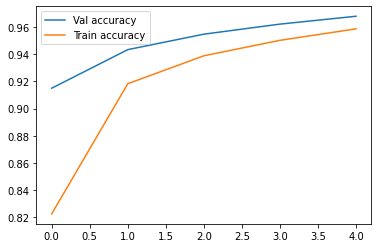

In [ ]:
plt.plot(result['val_accuracy'], label = "Val accuracy")
plt.plot(result['accuracy'], label = "Train accuracy")
plt.legend()
plt.show()

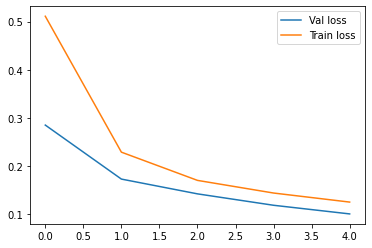

In [ ]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_val, y_val)

157/157 [==============================] - 1s 6ms/step - loss: 0.0997 - accuracy: 0.9680


[0.099668487906456, 0.9679999947547913]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predict_train = model.predict(X_train)
p_pred = predict_train.flatten()
#print(p_pred.round(2))
#print(confusion_matrix(y_train,predict_train))
#print(classification_report(y_train,predict_train))

y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

1407/1407 [==============================] - 4s 3ms/step
[1 1 0 ... 0 0 1]


In [ ]:
print(confusion_matrix(y_train, y_pred))

[[21863   616]
 [  695 21826]]


In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22479
           1       0.97      0.97      0.97     22521

    accuracy                           0.97     45000
   macro avg       0.97      0.97      0.97     45000
weighted avg       0.97      0.97      0.97     45000

